In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import operator


Importando csv do R com as features e dividindo em treino(70%) e teste (30%)

In [3]:
x = pd.read_csv('C:/Users/ferna/Desktop/PA_sample.csv' , encoding='latin-1')

In [13]:
df=pd.DataFrame(x)
t=0.7*len(df)
df_train=df.loc[:t]
df_test=df.loc[t:]

In [5]:
df_train.head()

,Unnamed: 0,TICKET,REQUEST_DATE,REQUEST_SERVICE,day,hour,part_of_the_day,dia_util,diff,mean_diff,sd_diff,count,mes,summary,temperature,precipProbability
0,1517392,516460,2019-06-25 08:26:08,LoadStopsWithinNM,2,8,1,1,0.0,19862.615873,197244.025498,2,6,2,17.93,0.0
1,2487635,583197,2019-06-25 08:26:09,GetScheds,2,8,1,1,2.0,11261.942446,60038.517996,2,6,2,17.93,0.0
2,1937492,550225,2019-06-25 08:26:10,LoadStopsWithinNM,2,8,1,1,2.0,32203.685567,279362.259255,2,6,2,17.93,0.0
3,1517393,516460,2019-06-25 08:26:11,GetScheds,2,8,1,1,3.0,19862.615873,197244.025498,3,6,2,17.93,0.0
4,1937493,550225,2019-06-25 08:26:11,GetScheds,2,8,1,1,1.0,32203.685567,279362.259255,3,6,2,17.93,0.0


Separando o treino entre conjuntos de features e label, e treinando a árvore de decisão


In [8]:

df_train_X=df_train.iloc[:,[4,5,6,7,8,11,12,13,14,15]]
df_train_Y=df_train.iloc[:,3]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_train_X, df_train_Y)

Separando o teste em conjuntos de label e features, depois fazendo a predição com as respostas que o modelo nos dá com as features do teste, adicionando a coluna das previsões ao conjunto de teste para comparar com a resposta real.

In [15]:
df_test_X=df_test.iloc[:,[4,5,6,7,8,11,12,13,14,15]]
df_test_Y=df_test.iloc[:,3]

In [16]:
predict=clf.predict(df_test_X)

In [18]:
df_test['Predict Decision Tree']=predict

C:\Users\ferna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Treinando o RandomForest, depois fazendo a predição com as features dos dados de teste e adicionando a coluna ao conjunto de teste para comparação posterior

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifier_rf = RandomForestClassifier(random_state=1986,
                           criterion='gini',
                           max_depth=10,
                           n_estimators=50,
                           n_jobs=-1)
classifier_rf.fit(df_train_X, df_train_Y);




In [20]:
predictions = classifier_rf.predict(df_test_X)
df_test['Random Forest Predict']=predictions

C:\Users\ferna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Treinando o SVC e colocando as predições no dataframe teste

In [21]:
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(df_train_X, df_train_Y)

C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [22]:
predictions1 = svc.predict(df_test_X)
df_test['SVC predicts']=predictions1

C:\Users\ferna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Fazendo o feature importance para os modelos

In [ ]:
features = df.iloc[:,[4,5,6,7,8,11,12,13,14,15]].columns

svc.fit(df.iloc[:,[4,5,6,7,8,11,12,13,14,15]],df.iloc[:,3])  # Treinando com tudo

features_importance = zip(svc.feature_importances_, features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

In [26]:
features = df.iloc[:,[4,5,6,7,8,11,12,13,14,15]].columns

classifier_rf.fit(df.iloc[:,[4,5,6,7,8,11,12,13,14,15]],df.iloc[:,3])  # Treinando com tudo

features_importance = zip(classifier_rf.feature_importances_, features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

diff: 94.662604%
count: 2.948056%
hour: 0.806796%
mes: 0.594010%
temperature: 0.366812%
part_of_the_day: 0.230749%
day: 0.131605%
precipProbability: 0.103588%
summary: 0.100340%
dia_util: 0.055442%


In [27]:
features = df.iloc[:,[4,5,6,7,8,11,12,13,14,15]].columns

classifier_rf.fit(df.iloc[:,[4,5,6,7,8,11,12,13,14,15]],df.iloc[:,3])  # Treinando com tudo

features_importance = zip(classifier_rf.feature_importances_, features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

KeyboardInterrupt: 

Calculando o Score dos modelos com o módulo de Cross Validation do Sklearn

In [32]:
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(clf, df_train_X,df_train_Y,
                            scoring='accuracy', cv=5)
scores_rf=cross_val_score(classifier_rf, df_train_X,df_train_Y,
                            scoring='accuracy', cv=5)
scores_svc=cross_val_score(svc, df_train_X,df_train_Y,
                            scoring='accuracy', cv=5)


print(scores_dt.mean())
print(scores_rf.mean())
print(scores_svc.mean())

KeyboardInterrupt: 

In [28]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(df_test['REQUEST_SERVICE'], df_test['Predict Decision Tree'], average='macro')

(0.3238772944572496, 0.3245290839224829, 0.3241350665785581, None)

In [29]:
precision_recall_fscore_support(df_test['REQUEST_SERVICE'], df_test['Random Forest Predict'], average='macro')

C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.38332596595628055, 0.37471039890712476, 0.3699903415254111, None)

In [30]:
precision_recall_fscore_support(df_test['REQUEST_SERVICE'], df_test['SVC predicts'], average='macro')

(0.1479352215236713, 0.151956888832176, 0.1402759306085471, None)

Correlação entre as features e a label

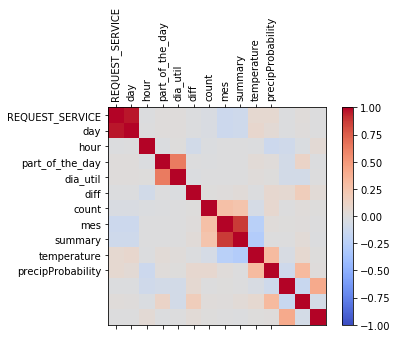

In [20]:
import matplotlib.pyplot as plt

corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_final.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_final.columns)
ax.set_yticklabels(df_final.columns)
plt.show()

Exportando os datasets para calcular acurácea e comparar no R

In [31]:
df_test.to_csv(r'C:/Users/ferna/Desktop/Models_Results.csv')

In [17]:
df_train.to_csv(r'C:/Users/ferna/Desktop/df_treino.csv')

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Confusion Matrix dos modelos

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_test['REQUEST_SERVICE'], df_test['Predict Decision Tree'])

array([[351074,    334, 204653,   1805],
       [   235,      1,    212,     17],
       [218887,    292, 375583,   1348],
       [  1706,     16,   1253,    113]], dtype=int64)

In [35]:
confusion_matrix(df_test['REQUEST_SERVICE'], df_test['Random Forest Predict'])

array([[497818,      0,  60048,      0],
       [   350,      0,    115,      0],
       [234581,      0, 361529,      0],
       [  2585,      0,    503,      0]], dtype=int64)

In [36]:
confusion_matrix(df_test['REQUEST_SERVICE'], df_test['SVC predicts'])

array([[ 31811, 150824, 372516,   2715],
       [    11,     17,    437,      0],
       [191420,  95255, 306354,   3081],
       [    59,     95,   2933,      1]], dtype=int64)

Plotando a árvore 

In [47]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
import graphviz

# creating PNG file for final presentation 
export_graphviz(clf,
                out_file = 'clf.dot',
                max_depth = 3,
                feature_names = df_train.iloc[:,[4,5,6,7,8,11,12,13,14,15]].columns.values)

with open("clf.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: too many indices for array

In [ ]:
len(df_test)